<a href="https://colab.research.google.com/github/aldireza/mangga_knn/blob/main/Aldi_Reza_Klasifikasi_Mangga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from imutils import paths
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt
import zipfile,os
import numpy as np
import argparse
import imutils
import cv2
import os
import pandas as pd

In [26]:
local_zip = 'Apel.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

local_zip = 'Arum Manis.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

local_zip = 'Budi Raja.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

local_zip = 'Jamadar.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

local_zip = 'Langdo.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

local_zip = 'Manalagi.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

local_zip = 'Rajapuri.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

In [5]:
main_dir = 'dataset'

apel_dir = os.path.join(main_dir, 'Apel')
arum_manis_dir = os.path.join(main_dir, 'Arum Manis')
budi_raja_dir = os.path.join(main_dir, 'Budi Raja')
jamadar_dir = os.path.join(main_dir, 'Jamadar')
langdo_dir = os.path.join(main_dir, 'Langdo')
manalagi_dir = os.path.join(main_dir, 'Manalagi')
rajapuri_dir = os.path.join(main_dir, 'Rajapuri')

print('Apel : ' + str(len(os.listdir(apel_dir))) + ' gambar')
print('Arum Manis : ' + str(len(os.listdir(arum_manis_dir))) + ' gambar')
print('Budi Raja : ' + str(len(os.listdir(budi_raja_dir))) + ' gambar')
print('Jamadar : ' + str(len(os.listdir(jamadar_dir))) + ' gambar')
print('Langdo : ' + str(len(os.listdir(langdo_dir))) + ' gambar')
print('Manalagi : ' + str(len(os.listdir(manalagi_dir))) + ' gambar')
print('Rajapuri : ' + str(len(os.listdir(rajapuri_dir))) + ' gambar')

Apel : 59 gambar
Arum Manis : 63 gambar
Budi Raja : 95 gambar
Jamadar : 98 gambar
Langdo : 85 gambar
Manalagi : 53 gambar
Rajapuri : 77 gambar


In [6]:
def image_to_feature_vector(image, size=(32, 32)):
	  return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(3, 3, 3)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    else:
        cv2.normalize(hist, hist)
    return hist.flatten()

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_colors(image, number_of_colors):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]

    data = [ordered_colors, labels, hex_colors, rgb_colors]
    
    return data

def show_chart(labels, hex_colors, ordered_colors):

    new_counter = []
    for i in range(0, len(attr[1])):
        if attr[1][i] != 0:
          new_counter.append(attr[1][i])

    counts = Counter(new_counter)

    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)

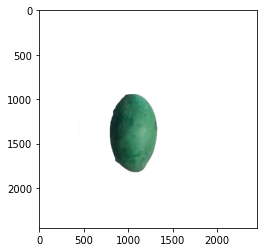

In [7]:
test_image = cv2.imread(arum_manis_dir + '/IMG_5426.JPG')
plt.imshow(test_image)

In [8]:
attr = get_colors(test_image, 8)
attr

[[array([0.99993661, 0.99994919, 0.99994448]),
  array([0.69994344, 0.764046  , 0.73495475]),
  array([0.3978862 , 0.64843244, 0.51690213]),
  array([0.24483809, 0.5193238 , 0.39023912]),
  array([0.16825522, 0.4166422 , 0.30958023]),
  array([0.12535514, 0.31636399, 0.24133967]),
  array([0.32250463, 0.5977403 , 0.45683316]),
  array([0.08180061, 0.20655387, 0.17523074])],
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 ['#fefefe',
  '#14342c',
  '#3e8463',
  '#b2c2bb',
  '#2a6a4e',
  '#65a583',
  '#529874',
  '#1f503d'],
 [array([254.98383452, 254.98704453, 254.98584133]),
  array([20.85915493, 52.67123795, 44.68383988]),
  array([ 62.43371378, 132.42756804,  99.51097454]),
  array([178.48557692, 194.83173077, 187.41346154]),
  array([ 42.90508021, 106.24376114,  78.942959  ]),
  array([101.46098004, 165.35027223, 131.81004235]),
  array([ 82.23868186, 152.42377579, 116.49245457]),
  array([31.96555966, 80.67281673, 61.54161542])]]

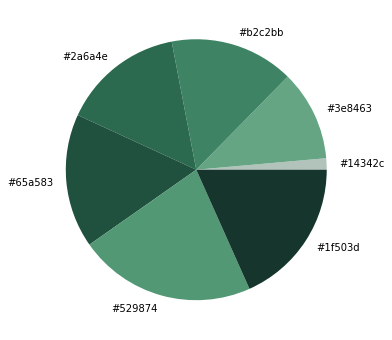

In [9]:
show_chart(attr[1], attr[2][1:], attr[0][1:])

In [10]:
test_hist = extract_color_histogram(test_image)
test_hist

array([4.4397864e-04, 2.1872295e-03, 9.9915200e-01, 1.4235364e-02,
       3.8103167e-02, 1.6812962e-03, 4.7172508e-03, 3.2754298e-03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.1538829e-05,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.0237330e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00], dtype=float32)

In [11]:
datagen_apel = []
for i in range(0,len(os.listdir(apel_dir))):
  image = cv2.imread(apel_dir +'/'+ os.listdir(apel_dir)[i])
  hist = extract_color_histogram(image)
  datagen_apel.append(hist)

df_apel = pd.DataFrame(datagen_apel)
df_apel['label'] = 'apel'
df_apel

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0.000000e+00,0.000245,0.998236,0.000006,0.007115,0.005824,0.000000,0.018255,0.055738,0.000000e+00,0.0,0.000092,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000109,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
1,0.000000e+00,0.000165,0.998252,0.000006,0.006436,0.006989,0.000008,0.022725,0.053721,0.000000e+00,0.0,0.000081,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000102,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
2,2.013221e-06,0.000381,0.997874,0.000777,0.008361,0.006268,0.000075,0.022666,0.060200,0.000000e+00,0.0,0.000083,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000098,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
3,4.198390e-06,0.000222,0.998256,0.000424,0.003010,0.014532,0.000426,0.025965,0.050894,0.000000e+00,0.0,0.000072,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000096,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
4,1.170567e-05,0.000213,0.997670,0.001967,0.003125,0.001837,0.001557,0.026935,0.062525,0.000000e+00,0.0,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000124,1.829011e-07,0.0,0.0,1.829011e-07,0.0,0.0,apel
5,4.929387e-05,0.000331,0.998376,0.001580,0.007017,0.010282,0.000277,0.020185,0.051769,0.000000e+00,0.0,0.000080,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000104,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
6,1.020008e-04,0.000590,0.999529,0.001180,0.020889,0.009427,0.001069,0.011695,0.016635,0.000000e+00,0.0,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000057,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
7,1.800947e-07,0.000182,0.998738,0.000168,0.003576,0.005053,0.001171,0.038317,0.031835,0.000000e+00,0.0,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000108,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
8,5.057909e-06,0.000239,0.998592,0.000617,0.005045,0.002894,0.002340,0.027912,0.044660,0.000000e+00,0.0,0.000102,0.0,0.0,0.0,0.0,0.0,0.0,7.225584e-07,0.000000e+00,0.000112,1.806396e-07,0.0,0.0,0.000000e+00,0.0,0.0,apel
9,1.527273e-05,0.000320,0.998495,0.001602,0.006494,0.010693,0.000518,0.023157,0.048091,0.000000e+00,0.0,0.000087,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000110,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel


In [12]:
datagen_arum_manis = []
for i in range(0,len(os.listdir(arum_manis_dir))):
  image = cv2.imread(arum_manis_dir +'/'+ os.listdir(arum_manis_dir)[i])
  hist = extract_color_histogram(image)
  datagen_arum_manis.append(hist)

df_arum_manis = pd.DataFrame(datagen_arum_manis)
df_arum_manis['label'] = 'arum manis'
df_arum_manis

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0.000181,0.000826,0.999651,0.011425,0.019739,0.001290,0.010613,0.007916,0.000000e+00,0.0,0.000000,0.000032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000025,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
1,0.000182,0.000558,0.999548,0.012728,0.026412,0.004292,0.004423,0.002410,0.000000e+00,0.0,0.000000,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000023,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
2,0.000323,0.000695,0.999672,0.013956,0.020624,0.004673,0.002291,0.002958,2.965028e-06,0.0,0.000000,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
3,0.000376,0.002252,0.999338,0.017093,0.030829,0.000033,0.008680,0.000720,0.000000e+00,0.0,0.000003,0.000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000039,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
4,0.000186,0.000773,0.999594,0.011513,0.025037,0.003473,0.004685,0.004272,0.000000e+00,0.0,0.000000,0.000013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.000070,0.000592,0.999247,0.008399,0.035668,0.000829,0.011357,0.005649,0.000000e+00,0.0,0.000000,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
59,0.000182,0.001068,0.999354,0.014637,0.032250,0.004824,0.002974,0.002141,5.293761e-07,0.0,0.000000,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000018,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
60,0.000567,0.000871,0.999248,0.015524,0.035367,0.002062,0.002247,0.000757,0.000000e+00,0.0,0.000000,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000022,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
61,0.000074,0.001096,0.999602,0.010601,0.019573,0.010757,0.011757,0.006757,3.715370e-06,0.0,0.000000,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,arum manis


In [13]:
datagen_budi_raja = []
for i in range(0,len(os.listdir(budi_raja_dir))):
  image = cv2.imread(budi_raja_dir +'/'+ os.listdir(budi_raja_dir)[i])
  hist = extract_color_histogram(image)
  datagen_budi_raja.append(hist)

df_budi_raja = pd.DataFrame(datagen_budi_raja)
df_budi_raja['label'] = 'budi_raja'
df_budi_raja

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0.000348,0.001165,0.996120,0.006728,0.012612,0.072014,0.009466,0.036999,0.029915,0.000000e+00,0.000000e+00,0.000093,0.0,0.0,0.0,0.0,0.0,0.0,0.000003,1.945015e-07,0.000126,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
1,0.001849,0.017709,0.986815,0.040773,0.152924,0.022821,0.006501,0.016363,0.000000,0.000000e+00,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000023,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
2,0.004070,0.012784,0.991973,0.043420,0.113214,0.031830,0.002941,0.009284,0.000000,0.000000e+00,0.000000e+00,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000018,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
3,0.000331,0.001379,0.996981,0.012102,0.073473,0.021919,0.001241,0.000371,0.000202,5.547328e-07,0.000000e+00,0.000026,0.0,0.0,0.0,0.0,0.0,0.0,0.000050,3.143486e-06,0.000037,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
4,0.004070,0.012784,0.991973,0.043420,0.113214,0.031830,0.002941,0.009284,0.000000,0.000000e+00,0.000000e+00,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000018,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.000479,0.001807,0.999442,0.009537,0.028902,0.005852,0.009700,0.007566,0.000003,0.000000e+00,0.000000e+00,0.000040,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000045,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
91,0.000208,0.000909,0.991731,0.014218,0.038422,0.101113,0.019122,0.064353,0.007778,0.000000e+00,0.000000e+00,0.000085,0.0,0.0,0.0,0.0,0.0,0.0,0.000006,0.000000e+00,0.000117,0.000004,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
92,0.000234,0.000646,0.996283,0.013741,0.083647,0.013853,0.001425,0.006331,0.000687,0.000000e+00,1.863795e-07,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.000006,0.000000e+00,0.000044,0.000007,0.0,0.0,1.863795e-07,0.0,0.0,budi_raja
93,0.000230,0.001805,0.999474,0.011050,0.024832,0.011259,0.011948,0.006362,0.000109,0.000000e+00,0.000000e+00,0.000037,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,1.780766e-07,0.000053,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja


In [14]:
datagen_jamadar = []
for i in range(0,len(os.listdir(jamadar_dir))):
  image = cv2.imread(jamadar_dir +'/'+ os.listdir(jamadar_dir)[i])
  hist = extract_color_histogram(image)
  datagen_jamadar.append(hist)

df_jamadar = pd.DataFrame(datagen_jamadar)
df_jamadar['label'] = 'jamadar'
df_jamadar

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0.000144,0.001304,0.999047,0.000580,0.019047,0.006973,0.000003,0.024855,0.029549,0.000000e+00,0.000000e+00,0.000104,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.610280e-07,0.000162,0.0,0.0,0.0,0.0,0.0,0.0,jamadar
1,0.000034,0.000696,0.998038,0.005650,0.016102,0.021836,0.009499,0.055289,0.002191,0.000000e+00,0.000000e+00,0.000029,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000051,0.0,0.0,0.0,0.0,0.0,0.0,jamadar
2,0.000082,0.000970,0.999404,0.006697,0.019954,0.019292,0.010260,0.016447,0.000509,0.000000e+00,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000032,0.0,0.0,0.0,0.0,0.0,0.0,jamadar
3,0.002278,0.001127,0.998625,0.002955,0.013744,0.014373,0.000568,0.042813,0.022432,7.336997e-07,4.035348e-06,0.000124,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,9.171246e-06,0.000155,0.0,0.0,0.0,0.0,0.0,0.0,jamadar
4,0.000186,0.004833,0.999559,0.009217,0.025303,0.002782,0.005640,0.009722,0.000000,0.000000e+00,3.528488e-07,0.000007,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000010,0.0,0.0,0.0,0.0,0.0,0.0,jamadar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.000070,0.000588,0.999040,0.004999,0.010677,0.016618,0.007841,0.029698,0.023651,0.000000e+00,3.648575e-07,0.000022,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000038,0.0,0.0,0.0,0.0,0.0,0.0,jamadar
94,0.000678,0.001888,0.999268,0.009321,0.035531,0.001847,0.003975,0.009571,0.000000,0.000000e+00,0.000000e+00,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000010,0.0,0.0,0.0,0.0,0.0,0.0,jamadar
95,0.000357,0.002528,0.999284,0.011208,0.035143,0.003799,0.003494,0.006163,0.000000,0.000000e+00,1.221147e-04,0.000007,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,jamadar
96,0.000618,0.004069,0.999478,0.008435,0.029134,0.001041,0.004546,0.009222,0.000000,0.000000e+00,0.000000e+00,0.000007,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000010,0.0,0.0,0.0,0.0,0.0,0.0,jamadar


In [15]:
datagen_langdo = []
for i in range(0,len(os.listdir(langdo_dir))):
  image = cv2.imread(langdo_dir +'/'+ os.listdir(langdo_dir)[i])
  hist = extract_color_histogram(image)
  datagen_langdo.append(hist)

df_langdo = pd.DataFrame(datagen_langdo)
df_langdo['label'] = 'langdo'
df_langdo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0.000070,0.006015,0.998751,0.011452,0.047676,0.007363,0.001349,0.000420,0.0,0.0,0.0,0.000063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,langdo
1,0.000026,0.001652,0.998596,0.013736,0.045023,0.023763,0.004690,0.000505,0.0,0.0,0.0,0.000013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000021,0.0,0.0,0.0,0.0,0.0,0.0,langdo
2,0.000037,0.002438,0.999230,0.008906,0.037098,0.008549,0.002060,0.001058,0.0,0.0,0.0,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,langdo
3,0.000144,0.001014,0.998375,0.018305,0.042169,0.033490,0.003395,0.000729,0.0,0.0,0.0,0.000020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000031,0.0,0.0,0.0,0.0,0.0,0.0,langdo
4,0.000047,0.000873,0.999366,0.008738,0.028764,0.018487,0.003537,0.003094,0.0,0.0,0.0,0.000010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,langdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.000111,0.001869,0.997257,0.015570,0.069314,0.020502,0.002611,0.000681,0.0,0.0,0.0,0.000007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,langdo
81,0.000174,0.001029,0.999538,0.009218,0.024467,0.014870,0.003383,0.002746,0.0,0.0,0.0,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,langdo
82,0.000431,0.004100,0.998112,0.022313,0.055520,0.013169,0.001315,0.000025,0.0,0.0,0.0,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000026,0.0,0.0,0.0,0.0,0.0,0.0,langdo
83,0.000130,0.002110,0.998864,0.014128,0.044714,0.008249,0.000477,0.000176,0.0,0.0,0.0,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,langdo


In [16]:
datagen_manalagi = []
for i in range(0,len(os.listdir(manalagi_dir))):
  image = cv2.imread(manalagi_dir +'/'+ os.listdir(manalagi_dir)[i])
  hist = extract_color_histogram(image)
  datagen_manalagi.append(hist)

df_manalagi = pd.DataFrame(datagen_manalagi)
df_manalagi['label'] = 'manalagi'
df_manalagi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0.000064,0.000449,0.999097,0.000502,0.033153,0.021100,0.000117,0.015947,2.576519e-03,0.000000e+00,0.000000e+00,0.000023,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000036,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
1,0.000004,0.000147,0.999447,0.000598,0.013768,0.019511,0.000084,0.013305,1.894247e-02,0.000000e+00,0.000000e+00,0.000082,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000106,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
2,0.000199,0.000226,0.998900,0.000283,0.006165,0.026831,0.000040,0.015496,3.466241e-02,0.000000e+00,0.000000e+00,0.000112,0.000000e+00,0.0,0.0,0.0,0.0,0.0,7.229092e-07,5.421820e-07,0.000129,9.036365e-07,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
3,0.000016,0.000100,0.998719,0.000281,0.006244,0.043186,0.000028,0.003138,2.541795e-02,0.000000e+00,0.000000e+00,0.000116,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000120,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
4,0.000061,0.000427,0.999642,0.002662,0.005363,0.007724,0.005499,0.022860,8.170288e-03,0.000000e+00,0.000000e+00,0.000018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000030,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
5,0.000158,0.000703,0.999280,0.007991,0.016533,0.021178,0.003131,0.024948,4.507968e-03,0.000000e+00,0.000000e+00,0.000016,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000024,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
6,0.000031,0.000531,0.999700,0.004050,0.011632,0.016643,0.002941,0.012495,2.589844e-03,0.000000e+00,0.000000e+00,0.000016,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000020,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
7,0.000314,0.000312,0.999163,0.000654,0.008296,0.030957,0.000371,0.006437,2.456829e-02,4.469171e-06,7.150674e-06,0.000093,3.575337e-07,0.0,0.0,0.0,0.0,0.0,8.938343e-07,1.251368e-06,0.000116,1.251368e-06,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
8,0.000108,0.000343,0.999432,0.001754,0.025986,0.013584,0.000690,0.016437,1.596489e-03,0.000000e+00,0.000000e+00,0.000007,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.768767e-07,0.000000e+00,0.000032,1.768767e-07,0.0,0.0,3.537535e-07,0.0,0.0,manalagi
9,0.000130,0.000214,0.999072,0.001132,0.008578,0.033206,0.000717,0.007261,2.497837e-02,0.000000e+00,0.000000e+00,0.000126,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.076855e-06,5.384276e-07,0.000129,1.974234e-06,0.0,0.0,0.000000e+00,0.0,0.0,manalagi


In [17]:
datagen_rajapuri = []
for i in range(0,len(os.listdir(rajapuri_dir))):
  image = cv2.imread(rajapuri_dir +'/'+ os.listdir(rajapuri_dir)[i])
  hist = extract_color_histogram(image)
  datagen_rajapuri.append(hist)

df_rajapuri = pd.DataFrame(datagen_rajapuri)
df_rajapuri['label'] = 'rajapuri'
df_rajapuri

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0.000056,0.000568,0.997490,0.007266,0.031828,0.006311,0.008917,0.061817,0.002615,0.0,0.000000e+00,0.000037,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000058,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
1,0.000026,0.000677,0.997000,0.002802,0.028804,0.004778,0.001615,0.058442,0.041374,0.0,0.000000e+00,0.000045,0.0,0.0,0.0,0.0,0.0,0.0,1.137027e-06,0.0,0.000078,0.000000e+00,0.0,0.0,1.895044e-07,0.0,0.0,rajapuri
2,0.001834,0.002715,0.994749,0.009736,0.050837,0.012677,0.020346,0.083724,0.014135,0.0,0.000000e+00,0.000063,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000048,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
3,0.000844,0.001619,0.996860,0.004530,0.042474,0.015463,0.013083,0.062774,0.009541,0.0,0.000000e+00,0.000019,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000027,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
4,0.000603,0.002067,0.993717,0.005913,0.017858,0.007265,0.020909,0.107503,0.010965,0.0,1.947098e-07,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000024,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.000219,0.000898,0.997369,0.005521,0.017545,0.024626,0.009282,0.062511,0.017789,0.0,0.000000e+00,0.000049,0.0,0.0,0.0,0.0,0.0,0.0,1.326810e-06,0.0,0.000073,1.705899e-06,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
73,0.000127,0.002060,0.988451,0.026827,0.144194,0.022059,0.005252,0.030554,0.000025,0.0,0.000000e+00,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000044,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
74,0.000076,0.000952,0.996966,0.010405,0.017974,0.015404,0.014545,0.071055,0.011340,0.0,0.000000e+00,0.000013,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000038,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
75,0.000070,0.000602,0.997226,0.002852,0.026808,0.009411,0.002383,0.063259,0.026766,0.0,0.000000e+00,0.000050,0.0,0.0,0.0,0.0,0.0,0.0,3.769619e-07,0.0,0.000082,1.884809e-07,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri


In [18]:
dffix = pd.concat([df_apel, df_arum_manis, df_budi_raja, df_jamadar, df_langdo, df_manalagi, df_rajapuri]).reset_index(drop=True)
dffix.to_csv('datafix.csv')

In [19]:
df = pd.read_csv('datafix.csv')
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0,0.000000,0.000245,0.998236,0.000006,0.007115,0.005824,0.000000,0.018255,0.055738,0.0,0.0,0.000092,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000109,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
1,1,0.000000,0.000165,0.998252,0.000006,0.006436,0.006989,0.000008,0.022725,0.053721,0.0,0.0,0.000081,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000102,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
2,2,0.000002,0.000381,0.997874,0.000777,0.008361,0.006268,0.000075,0.022666,0.060200,0.0,0.0,0.000083,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000098,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
3,3,0.000004,0.000222,0.998256,0.000424,0.003010,0.014532,0.000426,0.025965,0.050894,0.0,0.0,0.000072,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000096,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
4,4,0.000012,0.000213,0.997670,0.001967,0.003125,0.001837,0.001557,0.026935,0.062525,0.0,0.0,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000124,1.829011e-07,0.0,0.0,1.829011e-07,0.0,0.0,apel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,525,0.000219,0.000898,0.997369,0.005521,0.017545,0.024626,0.009282,0.062511,0.017789,0.0,0.0,0.000049,0.0,0.0,0.0,0.0,0.0,0.0,1.326810e-06,0.0,0.000073,1.705899e-06,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
526,526,0.000127,0.002060,0.988451,0.026827,0.144194,0.022059,0.005252,0.030554,0.000025,0.0,0.0,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000044,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
527,527,0.000076,0.000952,0.996966,0.010405,0.017974,0.015404,0.014545,0.071055,0.011340,0.0,0.0,0.000013,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000038,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
528,528,0.000070,0.000602,0.997226,0.002852,0.026808,0.009411,0.002383,0.063259,0.026766,0.0,0.0,0.000050,0.0,0.0,0.0,0.0,0.0,0.0,3.769619e-07,0.0,0.000082,1.884809e-07,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri


In [24]:
X = df.loc[:, '0':'26']
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=109)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy: 82.64150943396227 %


In [22]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Saving IMG_5506.JPG to IMG_5506.JPG
['langdo']


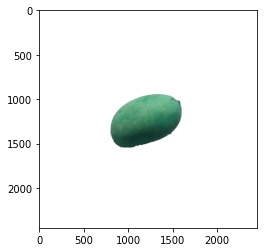

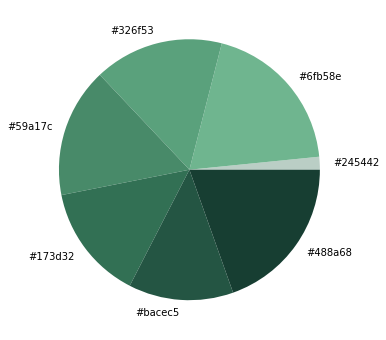

In [23]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn

    test_image = cv2.imread(path)
    plt.imshow(test_image)
    attr = get_colors(test_image, 8)
    show_chart(attr[1], attr[2][1:], attr[0][1:])

    hist_pred = extract_color_histogram(test_image)
    print(model.predict([hist_pred]))